La fuerza efectiva que realiza el viento sobre el mástil de un bote de velas puede aproximarse por la siguiente
expresión:
$F=\int_{0}^{30}
200(z/(
5+z))
e^{−2 z/300}
300
dz$
(donde F está dada en lbs y las distancias en pies).
Estime, utilizando los métodos de trapecios y de Simpson 1/3, cuánto vale la fuerza total y dónde será el punto
de acción efectiva de esta fuerza ( d=
1
F
∫
0
30
zf (z)dz ).
Utilice varios tamaños de paso de integración, entre 5 y 0.05 pies, y estudie la convergencia de cada método.


limite inferior 0
limite superior 30


100
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000]
[3225.6523917183977, 3431.0362618332665, 3495.7812359883237, 3527.4721655900585, 3546.272158434206, 3558.717064341175, 3567.563310821668, 3574.1746314230913, 3579.3029860658626, 3583.39701695845, 3586.7409742596014, 3589.523693012694, 3591.875528813791, 3593.889368860165, 3595.6331914700077, 3597.1578910309554, 3598.50232754287, 3599.6966851182406, 3600.7647652113856, 3601.7255889879234, 3602.594540042436, 3603.3841942757786, 3604.1049324919773, 3604.765399309985, 3605.3728515667144, 3605.933426059

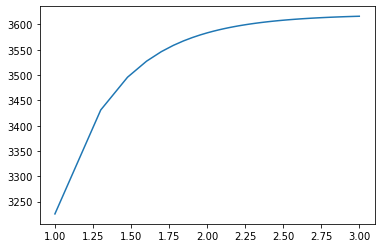

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#INTEGRACION POR TRAPECIOS V1.0 (recomendado usar la V4.0) 

inf=int(input("limite inferior"))
sup=int(input("limite superior"))
#n=int(input("n"))
#print(x)
#N=[]
#for i in range (0,1000,100):
 #   print(i)
#h=(sup-inf)/n

#f=0
#x=np.linspace(inf,sup,n)

#for i in range(1,n-1):
    
   # a=200*(x[i]/(x[i]+5))*np.exp((-2*x[i])/300)
    #f=f+a
#f0=200*(x[0]/(x[0]+5))*np.exp((-2*x[0])/300)
#fn=200*(x[n-1]/(x[n-1]+5))*np.exp((-2*x[n-1])/300)
#IL=(h/2)*(f0+fn+2*f)
#print(IL)


#print(x)

#INTEGRACION POR TRAPECIOS V2.0
N=[]
IL=[]
for i in range (10,1010,10):
    N.append(i)

#print(len(N))
#print(N)

for j in range(len(N)):
    h=(sup-inf)/N[j]
    x=np.linspace(inf,sup,N[j])
    f=0
    for i in range(1,N[j]-1):
        a=200*(x[i]/(x[i]+5))*np.exp((-2*x[i])/300)
        f=f+a
    f0=200*(x[0]/(x[0]+5))*np.exp((-2*x[0])/300)
    fn=200*(x[N[j]-1]/(x[N[j]-1]+5))*np.exp((-2*x[N[j]-1])/300)
    IL.append((h/2)*(f0+fn+2*f))
print(IL)
for i in range(len(N)):
    N[i]=np.log10(N[i])
plt.plot(N,IL)

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#INTEGRACION POR TRAPECIOS V3.0

inf=int(input("limite de integracion inferior"))
sup=int(input("limite de integracion superior"))

#Genera una función con variable z. La asigna a la función "f"
f = lambda z: 200 * (z/(5+z)) * np.exp((-2*z)/300)

#n=int(input("numero de intervalos"))


H=[]
#Genera un intervalo espaciado logaritmicamente
#np.logspace(a,b,c)--> a= 10^a (limite inferior); b=10^b (limite superior); c=cantidad de intervalos en los que se divide el intervalo [a,b], de una longitud logaritmica
#ej: np.logspace(2,4,20)= [100,10000, 20 intervalos equiespaciados en escala logaritmica]
#astype(int) hace que los valores del espaciado se guarden como enteros
t = np.logspace(0,2,20).astype(int)

#Para cada valor de t, evalua la funcion en el limite inferior y superior de integracion
#Tambien genera otro espaciado regular, entre los intervalos superior e inferior, con cada uno de los valores de t (Evaluados en el espacio i del vector t)
for i in t:
    #print(i)
    a=f(inf)+f(sup)
    #print(a)
    x=np.linspace(inf,sup,i)
    h=(sup-inf)/i
    
    #a partir de esto, suma todos los terminos, salvo el primero y el ultimo que ya estan sumados y los multiplica por 2
    for j in range(1,i-1):
        a=a+2*f(x[j])
    #Le damos la forma de trapecio
    IL=h*a/2
    #Guardamos los valores en un vector. Notar que el append esta dentro del for i in t; es decir, para cada valor i de t genera un IL, que luego lo guarda en el vector H
    H.append(IL)

limite de integracion inferior 0
limite de integracion superior 30


In [28]:
#INTEGRACION POR SIMPSON V1.0 (ESTA YA ES DEFINITIVA, SE HIZO JUNTO CON TRAPECIOS V3.0)

#Aprovechando los valores introducidos en trapecios, se calcula tambien por simpson
K=[]

#El t=np.logspace ya esta generado en el bloque anterior; el espiritu es el mismo
#La diferencia es que requiere un numero impar de intervalos
for i in t:
    a=f(inf)+f(sup)
    #print(a)
    x=np.linspace(inf,sup,(2*i)+1)
    h=(sup-inf)/((2*i+1-1))

    for j in range(1,(2*i)+1-1):
        if j % 2 == 0:
            a=a+4*f(x[j])
        else:
            a=a+2*f(x[j])
    IL=(h/3)*a
    K.append(IL)
print(K)

#Compensamos el hecho de tener un numero impar de intervalos
T=2*t+1


[2059.0253439779235, 2059.0253439779235, 2059.0253439779235, 2983.0940072914073, 2983.0940072914073, 3244.094744544233, 3360.086585936164, 3423.78625089175, 3463.4255798865224, 3509.43624809469, 3543.880715948818, 3562.1718685680203, 3576.291339598023, 3586.5493123257083, 3593.9123289483464, 3599.8334267681576, 3604.626165654001, 3607.9910433679647, 3610.65584282361, 3612.7323145065616]


In [26]:
#INTEGRACION POR CUADRATURA DE GAUSS
#Inputs: N="numero de puntos"=numero de puntos a usar en la cuadratura (Usar N: 1-7)
#inf="limite de integracion inferior"=limite de integracion inferior de la integral a aproximar
#sup="limite de integracion superior"=limite de integracion superior de la integral a aproximar

import numpy as np
#import matplotlib.pyplot as plt
#import copy

#importo los datos con np.loadtxt;
ti,n,ci = np.loadtxt("cuadraturagauss.txt",unpack=True) 
Cuad=np.array([
                np.array(ti).ravel(),
                np.array(n).ravel(),
                np.array(ci).ravel()
                ])
#En la matriz Cuad estan los coeficientes de la cuadratura de Gauss (ti, ci), para un dado numero de puntos (n)
#print(Cuad.shape)


N=int(input("numero de puntos"))
#f= lambda z: z**2
#f = lambda z: 200 * (z/(5+z)) * np.exp((-2*z)/300)
#inf=float(input("limite de integracion inferior"))
#sup=float(input("limite de integracion superior"))
m=(sup-inf)/2
c=(sup+inf)/2

#Evaluacion del cambio de variable en la funcion deseada
F = lambda t: f(m*t+c)
#print(F(1))
T=[]
C=[]

print(t)
L=[]
#Busco los coeficientes (ti, ci)
for l in t:
    j=-1
    
    for i in n:
        j+=1
        #print(j)
        if N == i:
            
            T.append(Cuad[0,j])
            C.append(Cuad[2,j])
    
#print(T[0])
#t=np.array(t).ravel()
#print(t.shape)
#print(F(1/np.sqrt(3)))
    #print(F(0))
    
    for i in range(len(T)):
        I=0
        #print(i)
        #print(I)
        #print(i,T[i],C[i],F(T[i]),F(-T[i]))
        neg=m*C[i]*F(-T[i])
        pos=m*C[i]*F(T[i])
        if neg==pos:
            I+=pos
        else:
            I+=neg+pos
    L.append(I)
    
print(L)


numero de puntos 2


[  1   1   1   2   2   3   4   5   6   8  11  14  18  23  29  37  48  61
  78 100]
[3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615, 3723.0364962496615]


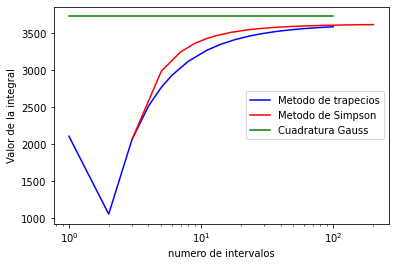

La fuerza efectiva segun trapecios es: 3583.39701695845 lbs La fuerza efectiva segun Simpson es: 3612.7323145065616 lbs


In [29]:
#ploteo de ambos graficos

plt.semilogx(t,H,'b', label = 'Metodo de trapecios')
plt.semilogx(T,K,'r', label ='Metodo de Simpson')
#plt.semilogx(t,L,'g',label='Cuadratura Gauss')
plt.legend(loc = 'center right')
plt.ylabel('Valor de la integral')
plt.xlabel('numero de intervalos')
plt.show()

print("La fuerza efectiva segun trapecios es:",H[len(H)-1],"lbs","La fuerza efectiva segun Simpson es:",K[len(K)-1],"lbs")

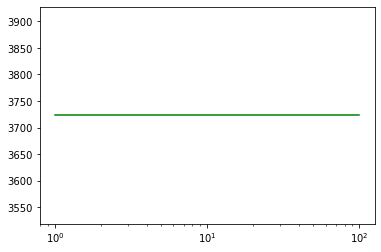

In [31]:
plt.semilogx(t,L,'g',label='cuadratura gauss')

In [3]:
#TRAPECIOS V4.0

import numpy as np
import matplotlib.pyplot as plt

f = lambda z: 200 * (z/(5+z)) * np.exp((-2*z)/300)

def trapecios(intervalo, f, pasos):
    espaciado=np.linspace(intervalo[0],intervalo[1],pasos)
    a=f(intervalo[0])+f(intervalo[0])
    
    for i in range(1,len(espaciado)-1):
        a += 2*f(espaciado[i])
    I=((intervalo[0]+intervalo[1])/(2*pasos))*a
    
    return I


In [7]:
#SIMPSON V2.0

import numpy as np
import matplotlib.pyplot as plt
f = lambda z: 200 * (z/(5+z)) * np.exp((-2*z)/300)

def simpson(intervalo, f, pasos):
    espaciado=np.linspace(intervalo[0],intervalo[1],pasos)
    a=f(intervalo[0])+f(intervalo[1])
    
    for i in range (1,len(espaciado)-1):
        if i % 2 == 0:
            a += 4*f(espaciado[i])
        else:
            a += 2*f(espaciado[i])
    I=((intervalo[0]+intervalo[1])/(3*(pasos-1)))*a
    
    return I

3619.289478209259